# RNN (Recurrent Neural Network)
---
(혼공 500p~)  
## 순환 신경망  
1. OneHot encoding - SimpleRNN layer  
1. Embedding layer - SimpleRNN layer  

### Load data

In [3]:
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=500)
# imdb datasest에서 가장 자주 쓰이는 단어 500개만 dictionary에 load
# dictionary에 없는 token은 2로 표현된다.

# 예약 정수
# 0: padding
# 1: 문장 시작
# 2: dictionary에 없는 token

In [4]:
X_train.shape, X_test.shape

((25000,), (25000,))

각 data는 리뷰마다 길이가 다르기 때문에 파이썬 list가 담긴 1차원 numpy array다.

- 첫 번째 리뷰 파이썬 list 길이

In [7]:
print(len(X_train[0]))

218


- 두번째 리뷰 파이썬 list 길이

In [9]:
print(len(X_train[1]))

189


각 token 길이가 샘플마다 다름을 확인할 수 있다.

In [11]:
print(X_train[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [12]:
print(y_train[:5]) # 1: 긍정, 0: 부정

[1 0 0 1 0]


### Train, validation split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [15]:
X_train.shape

(20000,)

### Train data analysis
리뷰별 길이

In [17]:
import numpy as np
# 리뷰 길이 배열
lengths = np.array([len(x) for x in X_train])
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [18]:
min(lengths), max(lengths) # 최소 최대

(11, 1854)

In [19]:
np.mean(lengths), np.median(lengths) # 평균, 중앙값

(239.00925, 178.0)

👉 평균이 239인데, 중앙값이 178이고 최대값은 1854임을 통해 skewed data임을 알 수 있다.

- Histo Plot
각 리뷰별 길이 빈도를 시각화해보자.

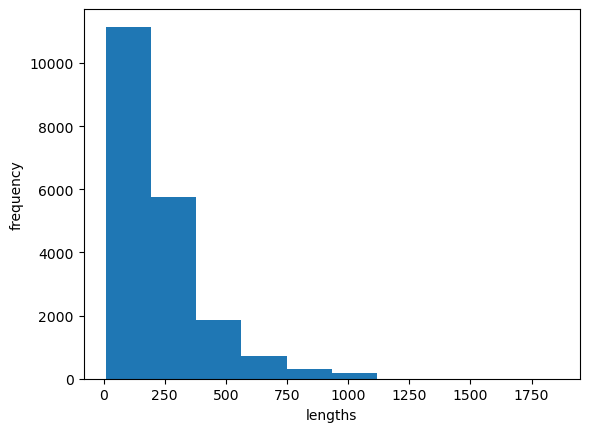

In [22]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

### Train data preprocessing
#### 리뷰 데이터 길이를 100으로 통일시킨다.
대부분의 리뷰 길이는 300미만으로 짧은 편이다. 이번 실습에서는 길이가 100인 데이터를 사용해보자.

이때 keras에서 제공하는 pad_sequences() 함수를 통해 길이를 맞출 수 있다.

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(X_train, maxlen=100) # maxlen보다 긴 sample은 자르고, 짧은 경우는 0으로 padding한다.
train_seq.shape

(20000, 100)

👉 길이가 100으로 맞춰진 2차원 배열이 되었다.

### Train_seq analysis

- train_seq 첫번째 데이터

In [28]:
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158])

첫 번째 data의 앞 뒤에 0이 없는 것을 보아 원래 길이가 100보다 길었을 것으로 예상된다.

그럼 앞이 잘렸을지, 뒤가 잘렸을지 살펴보자.

- 원본 훈련 데이터 첫 10개 원소

In [31]:
X_train[0][:10]

[1, 73, 89, 81, 25, 60, 2, 6, 20, 141]

- 원본 훈련 데이터 마지막 10개 원소

In [33]:
X_train[0][ -10:]

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]

👉 train_seq의 뒷 부분과 일치하고, 앞 부분과 불일치하는 것을 보아 **앞부분**이 잘림을 확인할 수 있다.  
이는 대부분의 sequence data의 뒷부분 정보가 더 유용할 것을 기대하기 때문이다.  
단, truncating parameter를 post로 지정하면 뒷부분을 잘라낼 수 있다.

- train_seq 6번째 데이터

In [36]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


👉 앞 부분이 0으로 padding 되어 원본 데이터 길이가 100미만이었을 것을 예상할 수 있다.  
padding 또한 위와 같은 이유로, 그리고 마지막 단어가 셀의 은닉 상태에 가장 큰 영향을 미치므로 **앞부분**에 0을 채운다.  
단, 이 역시 padding parameter를 post로 지정하여 뒷부분을 0으로 채울 수 있다.

### Validation data preprocessing
train data와 마찬가지로, 길이를 100으로 맞춘다.

In [39]:
val_seq = pad_sequences(X_val, maxlen=100)
val_seq.shape

(5000, 100)

### OneHotEncode tokens
정수 값 간 우선순위가 없기에 OneHotEncoding을 해야 한다.  
📌OneHotEncoding의 문제점  
data가 너무 sparse해져 모델이 무거워진다. 이를 해결하는 방안으로 단어 임베딩 방법이 있다. 이는 추후 다룰 것이다.

In [41]:
from tensorflow import keras

train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

In [42]:
train_oh.shape

(20000, 100, 500)

앞서, load_data 호출 시 고유 단어 수를 500개로 지정했다.  
이에 따라, one hot encoding 결과는 길이 500인 배열이다.

- train data의 첫번째 sample의 10번째 token 인코딩 결과

In [45]:
train_oh[0][0][:12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [46]:
np.sum(train_oh[0][0])

1.0

## Layer Construct

### 1️⃣simpleRNN layer - OneHot Encoding

In [48]:
rnn = keras.Sequential()

rnn.add(keras.layers.SimpleRNN(8, input_shape=(100, 500))) # defautl activation function : tanh
rnn.add(keras.layers.Dense(1, activation='sigmoid')) # output layer

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           4,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

### Train model

In [51]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
rnn.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = rnn.fit(train_oh, y_train, epochs=100, batch_size=64,
                  validation_data=(val_oh, y_val), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 113ms/step - accuracy: 0.5095 - loss: 0.6984 - val_accuracy: 0.5398 - val_loss: 0.6889
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.5566 - loss: 0.6845 - val_accuracy: 0.5926 - val_loss: 0.6726
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.6123 - loss: 0.6668 - val_accuracy: 0.6196 - val_loss: 0.6597
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6392 - loss: 0.6516 - val_accuracy: 0.6570 - val_loss: 0.6412
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.6673 - loss: 0.6338 - val_accuracy: 0.6766 - val_loss: 0.6230
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.6949 - loss: 0.6141 - val_accuracy: 0.7040 - val_loss: 0.6053
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.7148 - loss: 0.5923 - val_accuracy: 0.7178 - val_loss: 0.5856
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.7336 - loss:

In [52]:
early_stopping_cb.best_epoch

32

### Plot loss

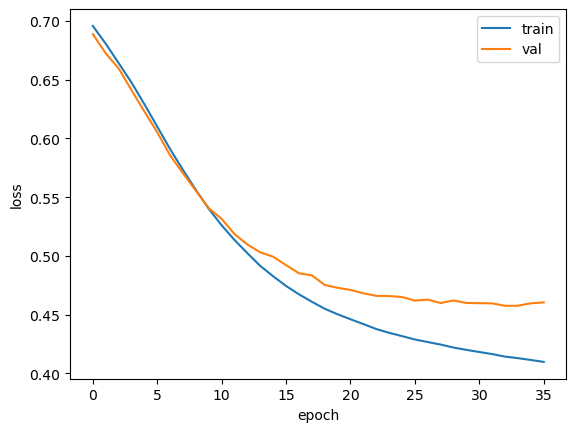

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### Model Evaluate

In [169]:
rnn.evaluate(val_oh, y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7877 - loss: 0.4597


[0.4574667513370514, 0.7889999747276306]

---
## Word Embeddidng

앞에서는 단어를 one-hot encoding하여 학습시켰다. 그랬더니, 훈련시간이 너무 오래 걸리고 resource가 낭비되는 문제가 발생했다.  
이를 해결하는 방안으로 단어 임베딩이 있다. Embedding layer를 SimpleRNN layer 앞에 추가하여 모델을 설계하고 다시 학습해보자.
> Embedding layer : 학습을 통해 단어를 정해진 크기의 실수 벡터로 바꿔준다.
### 2️⃣ SimpleRNN layer - Embeding layer

In [160]:
rnn2 = keras.Sequential()

rnn2.add(keras.layers.Embedding(500, 16)) #dictionary size, embedding vector size, input length
rnn2.add(keras.layers.SimpleRNN(8))
rnn2.add(keras.layers.Dense(1, activation='sigmoid')) #binary classification

In [162]:
rnn2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_10 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Train embed-RNN model

In [164]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
rnn2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = rnn2.fit(train_seq, y_train, epochs=100, batch_size=64,
                  validation_data=(val_seq, y_val), 
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.5175 - loss: 0.6965 - val_accuracy: 0.6032 - val_loss: 0.6720
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.6413 - loss: 0.6619 - val_accuracy: 0.7014 - val_loss: 0.6420
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.7027 - loss: 0.6366 - val_accuracy: 0.7174 - val_loss: 0.6250
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.7306 - loss: 0.6162 - val_accuracy: 0.7340 - val_loss: 0.6066
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7569 - loss: 0.5937 - val_accuracy: 0.7444 - val_loss: 0.5913
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7573 - loss: 0.5780 - val_accuracy: 0.7528 - val_loss: 0.5739
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.7646 - loss: 0.5610 - val_accuracy: 0.7632 - val_loss: 0.5537
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.7741 - loss: 0

In [171]:
early_stopping_cb.best_epoch

25

### Plot

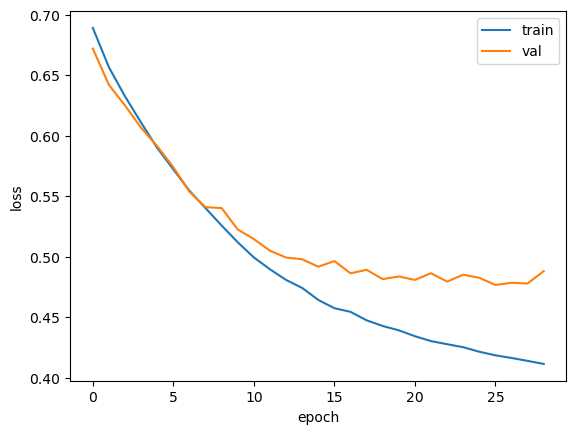

In [173]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [175]:
rnn2.evaluate(val_seq, y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7672 - loss: 0.4844


[0.4765689969062805, 0.7778000235557556]

👉 Embedding을 통해 One-Hot encoding을 했을 때보다 input data의 차원이 줄었고, 이에 따라 학습하는 가중치도 줄었지만, 비슷한 성능을 보인다.

Embedding을 통해 computing 자원을 효율적으로 사용할 수 있다.

- SimpleRNN 의 한계  
  긴 시퀀스 학습이 어렵다. 특히 멀리 떨어진 단어 정보를 인식하는 데 어렵다.  
  이에 대한 해결책으로 고급 순환층인 LSTM과 GRU가 있다. 다음엔 이를 알아보고 활용해보겠다.